In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(style="whitegrid")

#### we are using encoding:- 'ISO-8859-1' due to special characters in in 'text' column and UTF-8 can't encode it

* UTF-8: multibyte encoding that can represent any Unicode character
* ISO-8859-1 : single-byte encoding that can represent the first 256 Unicode characters

In [38]:
data = pd.read_csv("demonetization-tweets.csv",encoding = "ISO-8859-1") # load the data
data.head()  # print top 5 rows

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [39]:
data.text.size

14940

In [40]:
data=data.drop(['Unnamed: 0','X'], axis=1) # drop unwanted columns from data

# Check Postive , neutral and negative tweets

### Lets check percentage of Positive, Neutral , Negative sentiment  using  Pie chart

### First clean the tweet data from text column
* Use BeautifulSoup to remove HTML tags
* Get only word 
* use stopword to remove word like (the, an, is, a ) unrelavent words

In [41]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re

def get_clean_words(x):
    x= BeautifulSoup(x).get_text()   # remove all HTML tags
    
    x= re.sub('[^a-zA-Z0-9]',    # find the pattern 
             ' ',             # fill empty space instade of pattern
             x)               # find the resouses
    
    x= x.lower().split()  # convert into lower case
    
    stop = set(stopwords.words('english'))    
    words = [w for w in x if not w in stop] # remove stop words from tweet
    
    return (' '.join(words))

data['clean_data'] =data['text'].apply(lambda x: get_clean_words(x))

C:\Users\Gaurav\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Gaurav\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [42]:

    from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

sentiment = SentimentIntensityAnalyzer()
data['polarity_compound'] = data.clean_data.apply(lambda x: sentiment.polarity_scores(x)['compound'])
data['positive_sentiment'] = data.clean_data.apply(lambda x: sentiment.polarity_scores(x)['pos'] )
data['negative_sentiment'] = data.clean_data.apply(lambda x: sentiment.polarity_scores(x)['neg'])
data['neutral_sentiment'] = data.clean_data.apply(lambda x: sentiment.polarity_scores(x)['neu'])

In [43]:
data['sentiment_type']= ''

data.loc[data.polarity_compound > 0, 'sentiment_type']='Positve' 
data.loc[data.polarity_compound < 0, 'sentiment_type']='Negative' 
data.loc[data.polarity_compound == 0, 'sentiment_type']='Neutral'

### Plot bar plot

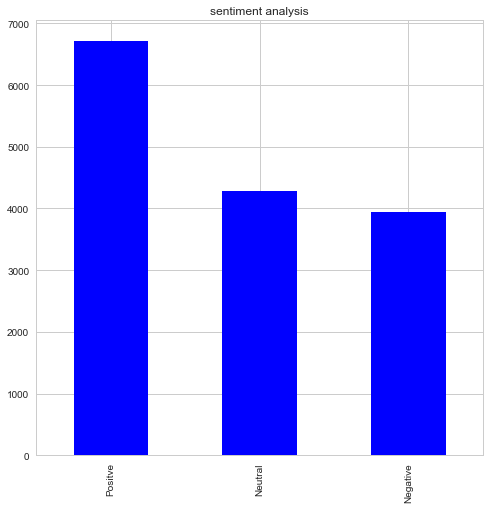

In [44]:
data.sentiment_type.value_counts().plot(kind ='bar' , title = 'sentiment analysis', figsize= (8,8),color= 'blue')
plt.show()

###  Plot pie chart to know percentage of Positive , neural, and negative

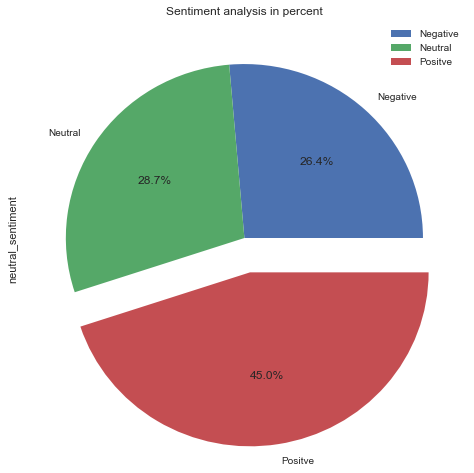

In [45]:
tweets_sentiment = data.groupby(['sentiment_type'])['neutral_sentiment'].count()

explode= (0,0,0.2)
tweets_sentiment.plot(kind= 'pie', figsize= (8,8), autopct= '%1.1f%%',explode= explode)
plt.legend()
plt.title('Sentiment analysis in percent')
plt.show()

# Check tweet count by devices

In [46]:
data['statusSource'][0]

'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'

In [47]:
data['device_used'] = data['statusSource'].str.extract('([A-Za-z]+\<)', expand = False)
data['device_used'] = data['device_used'].str.extract('([A-Za-z]+)', expand = True)

In [48]:
print(data['device_used'].unique())
print("\nNul values are {}".format(data['device_used'].isnull().sum()))

['Android' 'CPIMBadli' 'Client' nan 'iPhone' 'Phone' 'IFTTT' 'Facebook'
 'Windows' 'TweetDeck' 'iPad' 'Hootsuite' 'RoundTeam' 'Google' 'BlackBerry'
 'com' 'i' 'SocialNewsXYZ' 'Drivespark' 'Instagram' 'it' 'Social' 'Buffer'
 'Mac' 'AI' 'Ads' 'HubSpot' 'SocialOomph' 'Twitter' 'Peregrine'
 'NetCatNews' 'in' 'GrabInbox' 'MetroTwit' 'Widget' 'HeaderLabs' 'LinkedIn'
 'cryptohawk' 'Update' 'bitcoinagile' 'iOS' 'IEFX' 'li' 'TwixxyBot' 'bot'
 'Echofon' 'Nuzzel' 'Junction' 'Dabr' 'RealEstateBot' 'Studio' 'Singapore'
 'Buzz' 'Lite' 'growth' 'Post' 'co' 'YoruFukurou' 'cmssocialservice'
 'TwitterTrafficMachine' 'Klout' 'trump' 'Big' 'Twitterrific' 'App'
 'SCBotBackend' 'CoSchedule' 'Integration' 'easypybot' 'PostBeyond'
 'Sprinklr' 'agileminderbot' 'Publisher' 'Quora' 'IEHIAutoPost' 'Pluggio'
 'OccuWorld' 'SocioAdvocacy' 'Edgar' 'InvestmentWatch' 'Countdown' 'Tweets'
 'Willow' 'Customer' 'app' 'AgendaOfEvil' 'NGO' 'StockmarketStar'
 'BotByROP' 'salutcavaouiettoibienoubien' 'BitcoinBtcNews' 'retweet

### plot bar plot of all devices

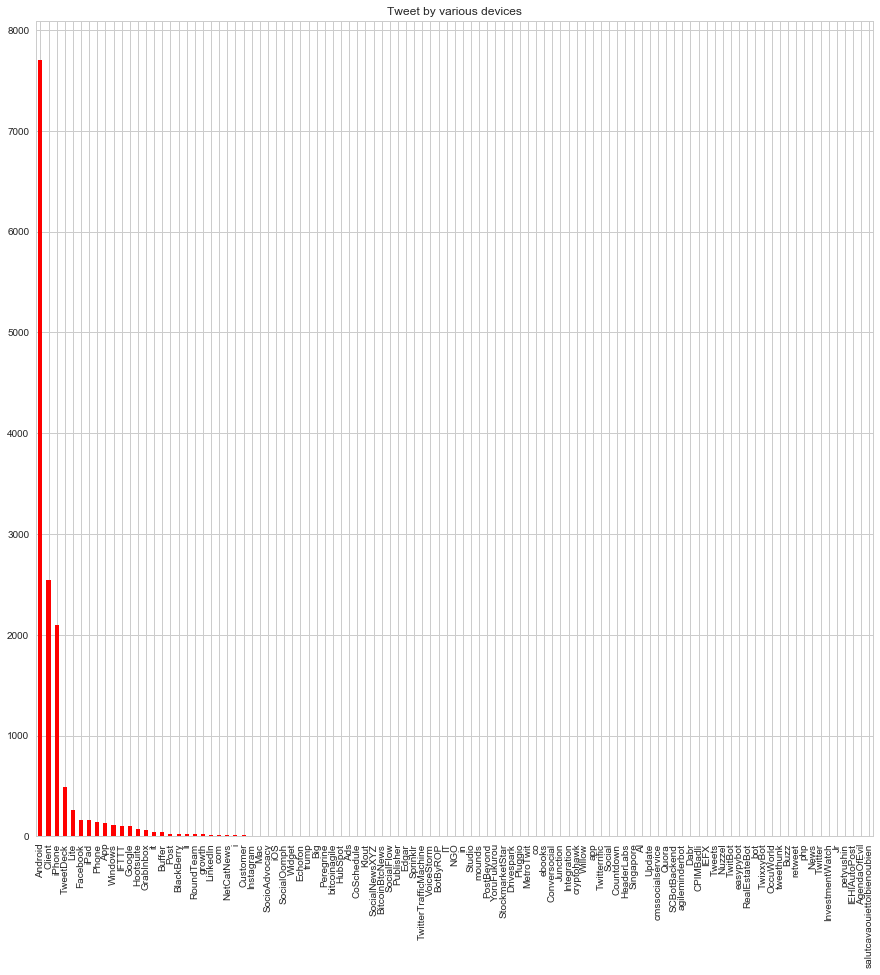

In [49]:
data.device_used.value_counts().plot(kind= 'bar', figsize= (15,15), color= 'red')
plt.title('Tweet by various devices')
plt.show()

#### Plot graph for Android, client , iphone , tweedeck, lite, ....... 

In [50]:
# create the list of devices
devices = ['Android','Client','iPhone', 'TweetDeck','Lite','Facebook','iPad','Phone', 'Windows','Google','BlackBerry',
          'IFTTT','Hootsuite','Mac','i','BlackBerry_Phone']

# replcae other than devices as 'other'
data['device_used_new']= ''

for i in range(len(data['device_used'])):
    if data['device_used'][i] not in devices:
        data['device_used'][i]='others'
               


C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
data['device_used'].unique()

array(['Android', 'others', 'Client', 'iPhone', 'Phone', 'IFTTT',
       'Facebook', 'Windows', 'TweetDeck', 'iPad', 'Hootsuite', 'Google',
       'BlackBerry', 'i', 'Mac', 'Lite'], dtype=object)

In [52]:
# convert phone and windows as ' Windows_phone               
data['device_used']= data['device_used'].replace(['Phone','Windows'],'Windows_Phone')

# covert apple product into apple_phone
data['device_used']= data['device_used'].replace(['iPhone','iPad','Mac','i'],'Apple_Phone')

# black berry to blackbery_phone
data['device_used']= data['device_used'].replace('BlackBerry','BlackBerry_Phone')

# fill Na with 'others'
data['device_used']= data['device_used'].fillna('others')






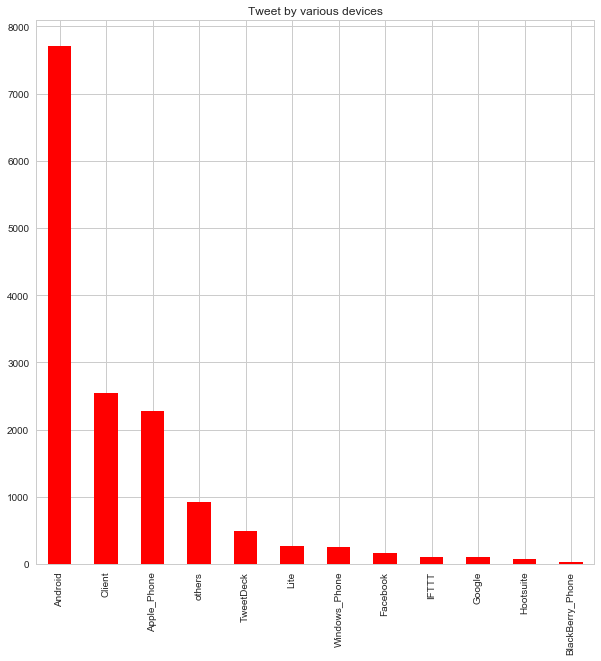

In [53]:
data.device_used.value_counts().plot(kind= 'bar', figsize= (10,10),color= 'red')
plt.title('Tweet by various devices')
plt.show()

# Create tweets per hours 

In [54]:
data['retweetCount'].describe()

count    14940.000000
mean       223.770147
std        411.793864
min          0.000000
25%          1.000000
50%         40.000000
75%        197.000000
max       5170.000000
Name: retweetCount, dtype: float64

In [55]:
pd.DatetimeIndex(data['created']).minute

array([40, 40, 40, ..., 19, 13, 13])

In [56]:
data['hour'] = pd.DatetimeIndex(data['created']).hour
data['minute']= pd.DatetimeIndex(data['created']).minute
data['date']= pd.DatetimeIndex(data['created']).date
data['count']= 1
retwitte_date_count = data[['hour', 'date', 'count', 'retweetCount']]

hour= retwitte_date_count.groupby(['hour']).sum().reset_index()
hour.head()

,hour,count,retweetCount
0,0,222,31868
1,1,307,65764
2,2,342,53562
3,3,513,67820
4,4,602,247478


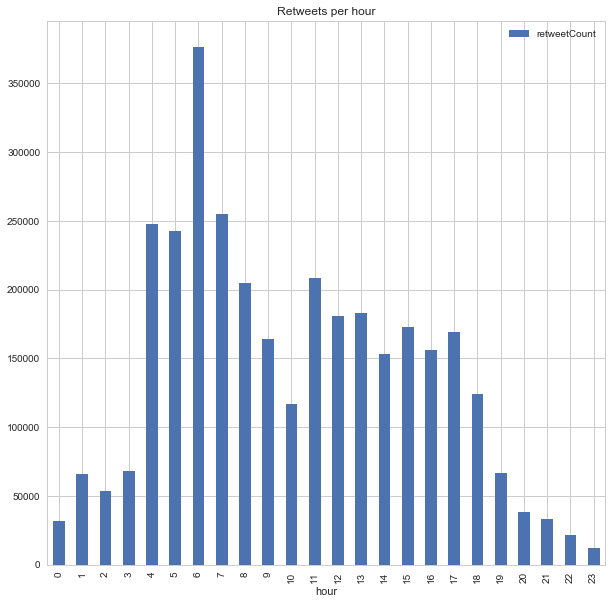

In [57]:
tweets_hour = data.groupby(['hour'])['retweetCount'].sum()
tweets_minute = data.groupby(['minute'])['retweetCount'].sum()
tweets_count= data.groupby(['count'])['retweetCount'].sum()

tweets_hour.plot(kind= 'bar',figsize= (10,10))

#hour['count'].plot(kind= 'bar', bottom =tweets_hour,color= 'green',figsize= (10,10),stacked=True)
plt.legend()
plt.title('Retweets per hour')
plt.show()

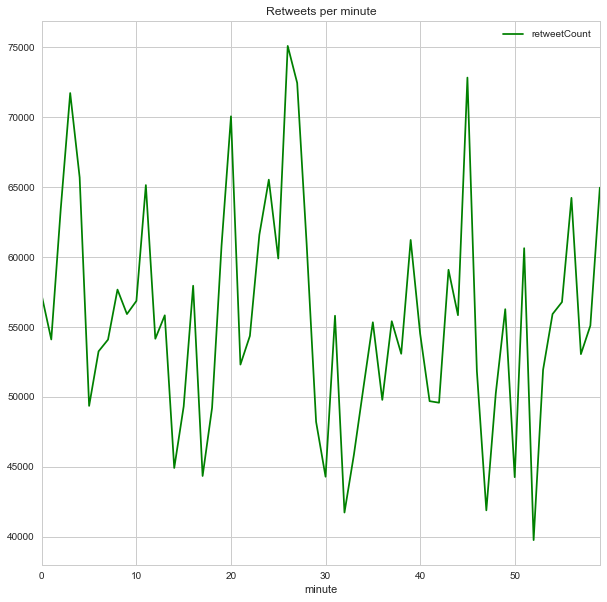

In [58]:

tweets_minute.plot(kind= 'line',figsize= (10,10),color= 'green')
plt.legend()
plt.title('Retweets per minute')
plt.show()

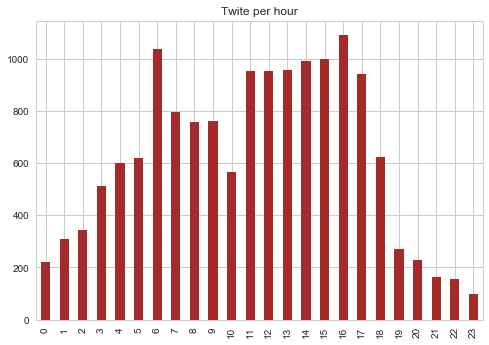

In [59]:


hour['count'].plot(kind= 'bar', color= 'brown')

plt.title("Twite per hour")
plt.show()

In [60]:
pivote_data= retwitte_date_count.pivot_table(retwitte_date_count, index= ['date', 'hour'], aggfunc= np.sum)
pivote_date = pivote_data.index.get_level_values(0).unique()   # take only unique values
print(pivote_date)

Index([2016-11-22, 2016-11-23, 2017-04-11, 2017-04-12, 2017-04-13, 2017-04-14,
       2017-04-15, 2017-04-16, 2017-04-17, 2017-04-18, 2017-04-19, 2017-04-20,
       2017-04-21],
      dtype='object', name='date')


#### Plot the graph twittes per day

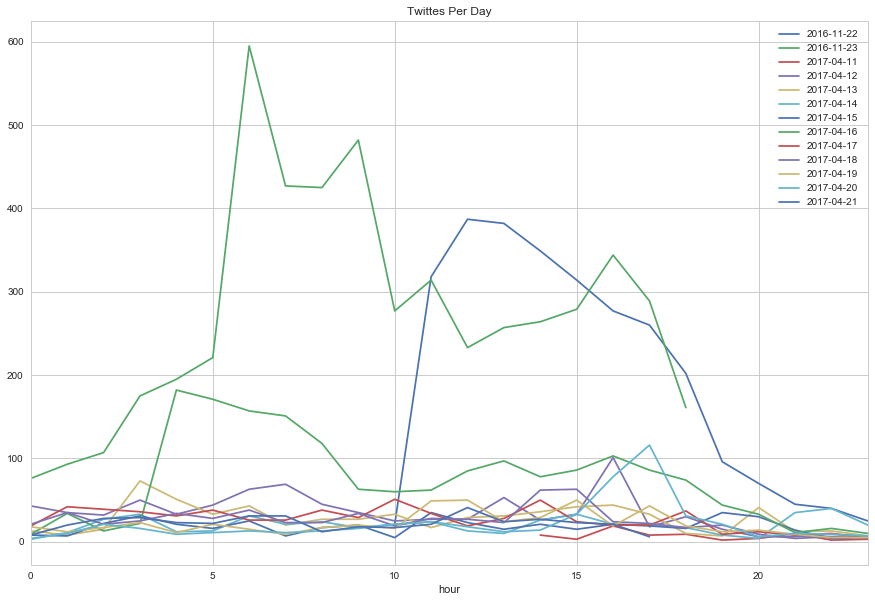

In [61]:
for date in pivote_date:
    split_date = pivote_data.xs(date)
    split_date['count'].plot(legend= True, label=''+ str(date), figsize= (15,10))
plt.title('Twittes Per Day')   
plt.show()

# Find out top 10 user based on Retwittes

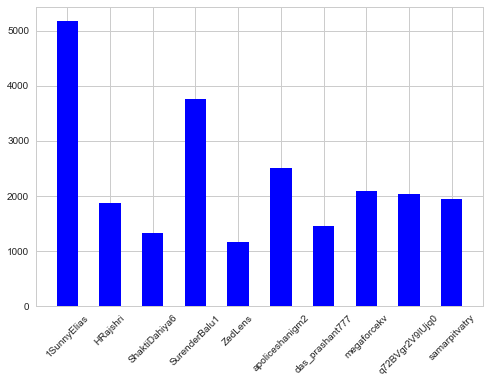

In [62]:
new_data =data[[ 'retweetCount', 'screenName']]
#new_data.head()
top_retweets_users=new_data.drop_duplicates('retweetCount')

top_retweets_users = top_retweets_users.sort_values('retweetCount', ascending =False).reset_index()
top_retweets_users.head()
plt.bar( top_retweets_users['screenName'].head(10),top_retweets_users['retweetCount'].head(10),
        color = 'blue', width =0.5)
plt.xticks(rotation=45)
plt.show()

In [63]:
top_retweets_users.head(10)

,index,retweetCount,screenName
0,8182,5170,1SunnyElias
1,9408,3754,SurenderBalu1
2,8692,2507,apoliceshanigm2
3,10397,2092,megaforcekv
4,8468,2037,q72BVgr2V9IUjq0
5,5996,1944,samarpitvatry
6,70,1868,HRajshri
7,8998,1443,das_prashant777
8,8001,1333,ShaktiDahiya6
9,318,1158,ZedLens


# Most famous tweets
* Based on wordcloud library
* Word clouds are a method for visually presenting text data.which are typically single words whose importance is visualized by way of their size and color.

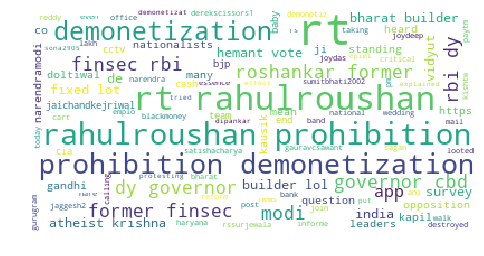

In [64]:
from wordcloud import WordCloud,STOPWORDS
wordcloud=WordCloud(background_color='white',max_words= 100, max_font_size=40, random_state=42).generate(str(data['clean_data']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Remove users name which are un-useful
* use stopword from wordcloud
* to add new stopwords use 
    * stopwods = set(STOPWORDS) then add new words like stopwords.add("new words")

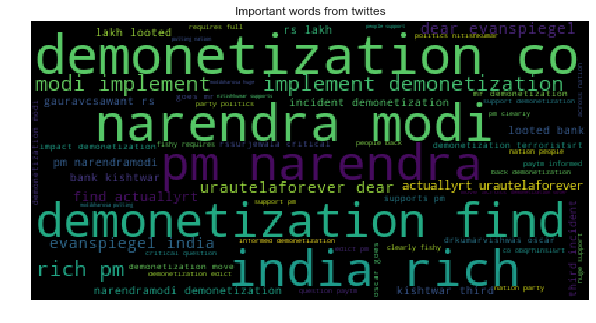

In [73]:
stopword = set(STOPWORDS)
stopword.add("rahulroushan")
stopword.add("hemant")
stopword.add("builder")
stopword.add("rt")
stopword.add("roshankar")
stopword.add("lol")
stopword.add("https")
stopword.add("atheist krishna")
stopword.add("kausik")
stopword.add("vidyut")
stopword.add("dy")
stopword.add("narendra modi")
stopword.add("kishtwar third")
stopword.add("pm narendra")
stopword.add("pm narendramodi")
# plot wordcloud

wordcloud=WordCloud(stopwords=stopword, max_words= 100,
                    max_font_size=40, random_state=42).generate(''.join(data['clean_data']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Important words from twittes')
plt.show()


# Find  out whoes tweets genrate more retweets 

In [66]:
top_users_retweets_recv = data[['text','retweetCount' ]]
top_users_retweets_recv.head()

,text,retweetCount
0,RT @rssurjewala: Critical question: Was PayTM ...,331
1,RT @Hemant_80: Did you vote on #Demonetization...,66
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",12
3,RT @ANI_news: Gurugram (Haryana): Post office ...,338
4,RT @satishacharya: Reddy Wedding! @mail_today ...,120


In [67]:
top_users_retweets_recv['rt_users']= data['text'].str.extract('(@\w{0,})',expand = False)


C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
'''happy_emotions =['U+1F600', 'U+1F601', 'U+1F602', 'U+1F923', 'U+1F603','U+1F604', 'U+1F60E', 'U+1F642']
angry_emotinos= ['<U+1F621>', '<U+1F620>', '<U+1F92C>']
sad_emotions= ['<U+1F62D>', '<U+1F622>', 'U+1F625']
no_emotions=[]
joy_emotions = ['<U+1F60E>', 'U+1F606']

smily_emo =[':-)', ':)', '(:', '(-:' ]
cry_emo= [':,(', ':\'(', ':"(', ':((']
love_emo = ['<3', ':\*' ] 
wink_emo= [';-)', ';)', ';-D', ';D', '(;', '(-;', ] 


emoticons = [
                ('__EMOT_SMILEY',[':-)', ':)', '(:', '(-:', ] ),
                ('__EMOT_LAUGH',[':-D', ':D', 'X-D', 'XD', 'xD', ] ),
                ('__EMOT_LOVE',['<3', ':\*', ] ),
                ('__EMOT_WINK',[';-)', ';)', ';-D', ';D', '(;', '(-;', ] ),
                ('__EMOT_FROWN',[':-(', ':(', '(:', '(-:', ] ),
                ('__EMOT_CRY',[':,(', ':\'(', ':"(', ':(('] )
            ]

#For emoticon regexes
def escape_paren(arr):
    return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]

def processEmoticons( text, subject='', query=[]):
    for (repl, regx) in emoticons_regex :
        text = re.sub(regx, ' '+repl+' ', text)
        return text

def regex_union(arr):
    return '(' + '|'.join( arr ) + ')'

emoticons_regex = [ (repl, re.compile(regex_union(escape_paren(regx))))for (repl, regx) in emoticons ]

def count_emotions(text):
    count=0
    for (repl, regx) in emoticons_regex:
        count+=len(re.findall(repl, regx))
    return count


arr_emotions= []
i =0
for text in data['text']:
    arr_emotions=count_emotions(text)
    i+=1
#print(emoticons_regex)'''


## Creating Features vectors

In [70]:
 from sklearn.feature_extraction.text import CountVectorizer
    
vectorizer =CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, max_features=5000)

train_data_features = vectorizer.fit_transform(data['clean_data'])

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

In [71]:
print(train_data_features.shape)

(14940, 5000)


In [72]:
# take a look at word in vocabulary
vocab = vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set

vocab_count=[]
vocab_word =[]
for tag, count in zip(vocab, dist):
    print
    vocab_count.append(count)
    vocab_word.append(tag)